Predicción de gastos médicos
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/predictive-analytics/blob/master/13-regression-R-medical-expenses.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/predictive-analytics/blob/master/13-regression-R-medical-expenses.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/predictive-analytics/blob/master/readme.md)

# Definición del problema real

Una compañía de seguros desea pronósticar los gastos médicos de la población asegurada con el fin de recolectar un valor superior en ingresos, tal que le permita obtener utilidades. Los costos son difíciles de pronósticar ya que: las condiciones más costosas son más raras y parecen aleatorias; y que ciertas condiciones son más probables para ciertos segmentos de la población (infarto en personas obesas y cáncer en fumadores).

# Definición del problema en términos de los datos

El objetivo es usar una base de datos con 1338 registros de gastos médicos hipotéticos para pacientes de EU con el fin de estimar los costos para determinados segmentos de la población. La información registrada es la siguiente:

* Age: entero hasta 64.

* Sex: male, female.

* bmi: Body mass index.

* children: entero indicando la cantidad de hijos/dependientes cubiertos por el plan de salud.

* smoker: yes, no.

* region: northest, southeast, southwest, northwest.

* charges: costos.


# Exploración

In [ ]:
## Carga y verificación de los datos.
## La variable charges es la que se desea pronósticar.
## insurance <- read.csv("data/insurance.csv", stringsAsFactors = TRUE)
## str(insurance)

## 'data.frame':	1338 obs. of  7 variables:
##  $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
##  $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
##  $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
##  $ children: int  0 1 3 0 0 0 1 3 2 0 ...
##  $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
##  $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
##  $ charges : num  16885 1726 4449 21984 3867 ...
## 

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [ ]:
## información estadística de la variable dependiente
## summary(insurance$charges)

##    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
##    1122    4740    9382   13270   16640   63770 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

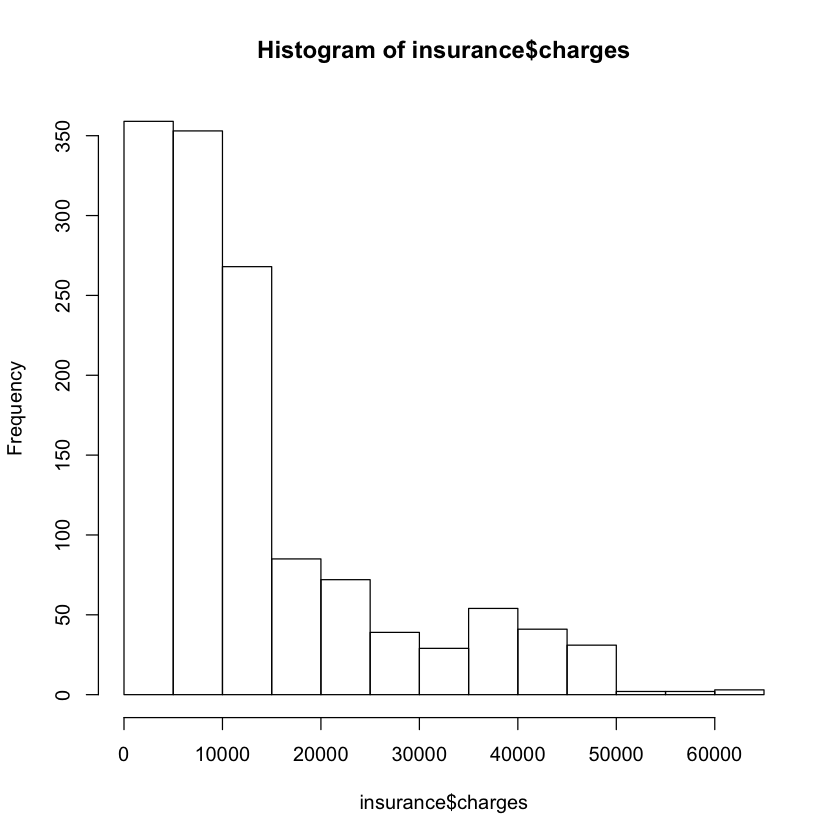

In [ ]:
## histograma.
## Muestra que la mayor parte de la población tiene 
## gastos bajos, mientras que disminuye la frecuencia
## de costos más altos es más baja.
## hist(insurance$charges)

## Plot with title “Histogram of insurance$charges”

In [ ]:
## todas las regiones tienen aproximadamente
## la misma cantidad de casos.
## table(insurance$region)

## 
## northeast northwest southeast southwest 
##       324       325       364       325 


northeast northwest southeast southwest 
      324       325       364       325 

In [ ]:
## el análisis de correlación muestra que 
## existe una mayor correlación de los gastos
## con la edad y el bmi, pero no con la 
## cantidad de dependientes.
## cor(insurance[c("age", "bmi", "children", "charges")])

##          age       bmi       children   charges   
## age      1.0000000 0.1092719 0.04246900 0.29900819
## bmi      0.1092719 1.0000000 0.01275890 0.19834097
## children 0.0424690 0.0127589 1.00000000 0.06799823
## charges  0.2990082 0.1983410 0.06799823 1.00000000

,age,bmi,children,charges
age,1.0000000,0.1092719,0.04246900,0.29900819
bmi,0.1092719,1.0000000,0.01275890,0.19834097
children,0.0424690,0.0127589,1.00000000,0.06799823
charges,0.2990082,0.1983410,0.06799823,1.00000000


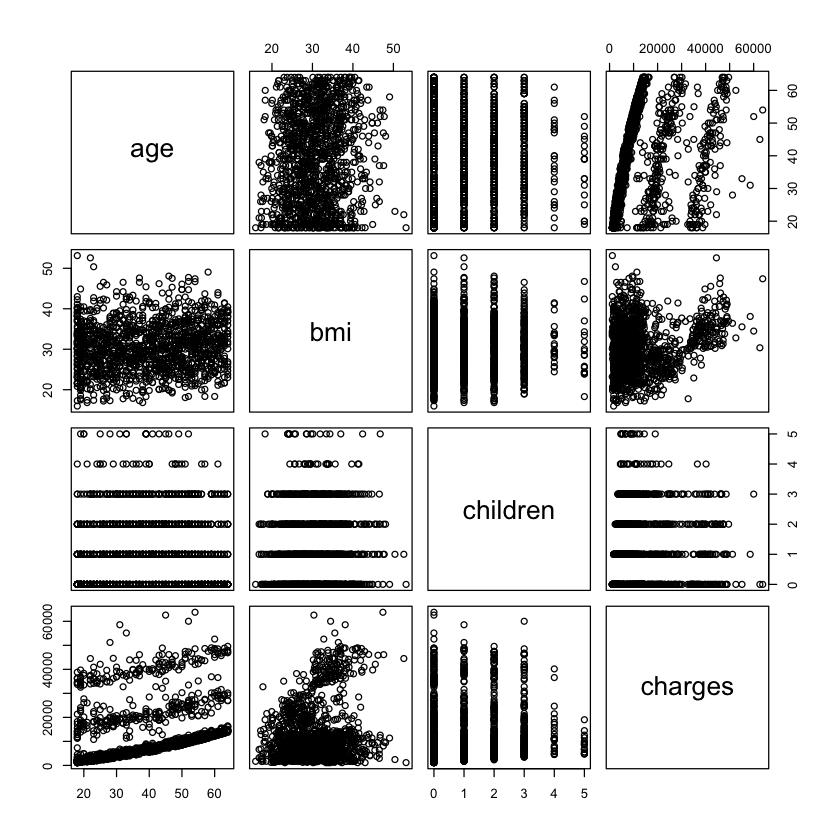

In [ ]:
## Se construye la siguiente gráfica para
## visualizar relaciones entre las variables
## pairs(insurance[c("age", "bmi", "children", "charges")])

## la gráfica muestra una relación entre age y charges, 
## y dos grupos para bmi y charges.

## plot without title

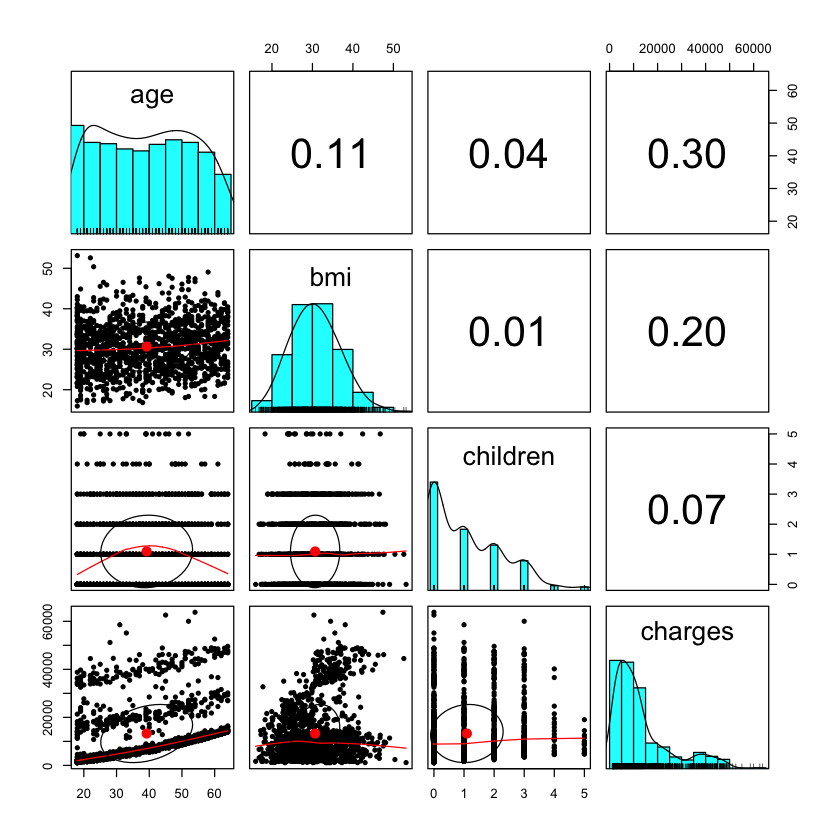

In [ ]:
## Una gráfica más informativa se obtiene de con la 
## función pairs.panels().
## install.packages("psych")
## library(psych)
## pairs.panels(insurance[c("age", "bmi", "children", "charges")])

## plot without title

**Ejercicio.--** Cómo se interpreta la gráfica anterior?

# Metodología

En un modelo de regresión, la variable dependiente es una función lineal de las variables independientes, tal que:


$$y = w_0 + w_1 * x_1 + ... = w_0 + \sum_{i=1}^N w_i*x_i $$


Donde: 


* $y$ es la variable explicativa y corresponde a los gastos médicos para este problema en particular 


* $x_i$ son variables explicativas del comportamiento de $y$ y corresponden a las otras variables del data.frame.


* $w_i$ son los coeficientes de la regresión. $w_0$ es el intercepto.


En términos matemáticos, el modelo anterior se escribe como:


$$ y = e + w_0 + \sum_{i=1}^N w_i*x_i$$ 

con $e$ siguiendo una distribución normal con media cero y varianza $\sigma$ constante y desconocida.

En la siguiente figura se presenta la regresión de $y = e + w_0 + w_1 * x$. Los puntos negros representan los datos (las observaciones), y la línea negra representa la ecuación de regresión. Las líneas rojas representan el error $e$ entre las observaciones y los valores correspondientes para el mismo valor de $x$ usando el modelo de regresión. 

![alt text](images/regxy.jpg)

La estimación de los parámetros $w_i$ del modelo se realiza por mínimos cuadrados ordinarios (OLS), o lo que es lo mismo, minimizando la suma de los errores al cuadrado ($\sum e^2$).

En la especificación de un modelo se debe verificar lo siguiente:


* Los coeficientes $w_i$ deben ser estadísticamente diferentes de cero.


* La distribución de los errores $e$ debe ser normal.


* La varianza ($\sigma^2$) de los errores debe ser constante.


El no cumplimiento de estos supuestos indica que pueden haber problemas en la especificación del modelo.

# Entrenamiento del modelo

In [ ]:
## Se usa la función lm para estimar el modelo de
## regresión lineal.
## ins_model <- lm(charges ~ age + children + bmi + sex + smoker + region, 
##                 data = insurance)
## ins_model

## 
## Call:
## lm(formula = charges ~ age + children + bmi + sex + smoker + 
##     region, data = insurance)
## 
## Coefficients:
##     (Intercept)              age         children              bmi  
##        -11938.5            256.9            475.5            339.2  
##         sexmale        smokeryes  regionnorthwest  regionsoutheast  
##          -131.3          23848.5           -353.0          -1035.0  
## regionsouthwest  
##          -960.1  
## 


Call:
lm(formula = charges ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Coefficients:
    (Intercept)              age         children              bmi  
       -11938.5            256.9            475.5            339.2  
        sexmale        smokeryes  regionnorthwest  regionsoutheast  
         -131.3          23848.5           -353.0          -1035.0  
regionsouthwest  
         -960.1  


In [ ]:
## Ya que el modelo usa todas las variables 
## explicativas disponibles, la llamada a la
## función puede simplificarse como:
## ins_model <- lm(charges ~ ., data = insurance)
## ins_model

## 
## Call:
## lm(formula = charges ~ ., data = insurance)
## 
## Coefficients:
##     (Intercept)              age          sexmale              bmi  
##        -11938.5            256.9           -131.3            339.2  
##        children        smokeryes  regionnorthwest  regionsoutheast  
##           475.5          23848.5           -353.0          -1035.0  
## regionsouthwest  
##          -960.1  
## 


Call:
lm(formula = charges ~ ., data = insurance)

Coefficients:
    (Intercept)              age          sexmale              bmi  
       -11938.5            256.9           -131.3            339.2  
       children        smokeryes  regionnorthwest  regionsoutheast  
          475.5          23848.5           -353.0          -1035.0  
regionsouthwest  
         -960.1  


**Ejercicio.--** En la tabla de datos no existen las variables sexmale y smokeryes, cómo se obtuvieron?

# Evaluación del modelo

In [ ]:
## summary(ins_model)

## 
## Call:
## lm(formula = charges ~ ., data = insurance)
## 
## Residuals:
##      Min       1Q   Median       3Q      Max 
## -11304.9  -2848.1   -982.1   1393.9  29992.8 
## 
## Coefficients:
##                 Estimate Std. Error t value Pr(>|t|)    
## (Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
## age                256.9       11.9  21.587  < 2e-16 ***
## sexmale           -131.3      332.9  -0.394 0.693348    
## bmi                339.2       28.6  11.860  < 2e-16 ***
## children           475.5      137.8   3.451 0.000577 ***
## smokeryes        23848.5      413.1  57.723  < 2e-16 ***
## regionnorthwest   -353.0      476.3  -0.741 0.458769    
## regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
## regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
## ---
## Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
## 
## Residual standard error: 6062 on 1329 degrees of freedom
## Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
## F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16
## 


Call:
lm(formula = charges ~ ., data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


**Ejercicio.--** Cómo se interpreta la tabla anterior?

# Mejora del modelo

En un modelo lineal es posible considerar relaciones no lineales por medio de la transformación de las variables. En el siguiente caso se agrega la edad al cuadrado al dataframe.

In [ ]:
## insurance$age2 <- insurance$age^2

Adicionalmente, se considera que la variable bmi podría ser reemplazada simplemente por una variable indicadora que toma el valor de 1 si el bmi es igual o mayor a 30, y cero en caso contrario. 

In [ ]:
## insurance$bmi30 <- ifelse(insurance$bmi >= 30, 1, 0)

Más aún, es posible considerar la interacción de dos o más variables. En el siguiente caso, se considera la interación de smoker y bmi30. La notación var1:var2 es equivalente a var1 + var2 + var1*var2. 

In [ ]:
## El siguiente model considera simultáneamente 
## el efecto no lineal de la edad, si la persona es 
## obesa y la interacción entre obesidad y que la persona
## sea fumadora.
## ins_model2 <- lm(charges ~ age + age2 + children + bmi + sex + bmi30*smoker + region, 
##                  data = insurance)
## summary(ins_model2)

## 
## Call:
## lm(formula = charges ~ age + age2 + children + bmi + sex + bmi30 * 
##     smoker + region, data = insurance)
## 
## Residuals:
##      Min       1Q   Median       3Q      Max 
## -17296.4  -1656.0  -1263.3   -722.1  24160.2 
## 
## Coefficients:
##                   Estimate Std. Error t value Pr(>|t|)    
## (Intercept)       134.2509  1362.7511   0.099 0.921539    
## age               -32.6851    59.8242  -0.546 0.584915    
## age2                3.7316     0.7463   5.000 6.50e-07 ***
## children          678.5612   105.8831   6.409 2.04e-10 ***
## bmi               120.0196    34.2660   3.503 0.000476 ***
## sexmale          -496.8245   244.3659  -2.033 0.042240 *  
## bmi30           -1000.1403   422.8402  -2.365 0.018159 *  
## smokeryes       13404.6866   439.9491  30.469  < 2e-16 ***
## regionnorthwest  -279.2038   349.2746  -0.799 0.424212    
## regionsoutheast  -828.5467   351.6352  -2.356 0.018604 *  
## regionsouthwest -1222.6437   350.5285  -3.488 0.000503 ***
## bmi30:smokeryes 19810.7533   604.6567  32.764  < 2e-16 ***
## ---
## Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
## 
## Residual standard error: 4445 on 1326 degrees of freedom
## Multiple R-squared:  0.8664,	Adjusted R-squared:  0.8653 
## F-statistic: 781.7 on 11 and 1326 DF,  p-value: < 2.2e-16
## 


Call:
lm(formula = charges ~ age + age2 + children + bmi + sex + bmi30 * 
    smoker + region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-17296.4  -1656.0  -1263.3   -722.1  24160.2 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       134.2509  1362.7511   0.099 0.921539    
age               -32.6851    59.8242  -0.546 0.584915    
age2                3.7316     0.7463   5.000 6.50e-07 ***
children          678.5612   105.8831   6.409 2.04e-10 ***
bmi               120.0196    34.2660   3.503 0.000476 ***
sexmale          -496.8245   244.3659  -2.033 0.042240 *  
bmi30           -1000.1403   422.8402  -2.365 0.018159 *  
smokeryes       13404.6866   439.9491  30.469  < 2e-16 ***
regionnorthwest  -279.2038   349.2746  -0.799 0.424212    
regionsoutheast  -828.5467   351.6352  -2.356 0.018604 *  
regionsouthwest -1222.6437   350.5285  -3.488 0.000503 ***
bmi30:smokeryes 19810.7533   604.6567  32.764  < 2e-16 ***


Nóte que este modelo tiene un r2 superior al del modelo original.

**Ejercicio.--** Elimine las variables no significativas.

---

Predicción de gastos médicos
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/predictive-analytics/blob/master/13-regression-R-medical-expenses.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/predictive-analytics/blob/master/13-regression-R-medical-expenses.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/predictive-analytics/blob/master/readme.md)